# EDA BATTEL POKEMON

## Imports

**Version of python = 3.13.2**

**Versions of package**
- *Pandas*     = 3.0.0
- *Numpy*      = 2.4.2
- *Matplotlib* = 3.10.8
- *Seaborn*    = 0.13.2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

# Render plots inline
%matplotlib inline

In [2]:
#Insert data into dataframes
df_pokemon = pd.read_csv('../data/pokemon.csv')
df_combats = pd.read_csv('../data/combats.csv')

print("Pokémons:", df_pokemon.shape)
print("Batallas:", df_combats.shape)

Pokémons: (800, 12)
Batallas: (50000, 3)


In [3]:
# Contamos cuántas veces aparece cada Pokémon como primer y segundo atacante
veces_1ro = df_combats['First_pokemon'].value_counts()
veces_2do = df_combats['Second_pokemon'].value_counts()

# Sumamos ambas posiciones para tener el total de peleas por ID
total_peleas = veces_1ro.add(veces_2do, fill_value=0)

# 3. Contar victorias por cada ID
total_victorias = df_combats['Winner'].value_counts()

# 4. Crear un DataFrame de rendimiento para hacer el cálculo
# Usamos el ID del pokemon como índice
rendimiento = pd.DataFrame({
    'Peleas': total_peleas,
    'Victorias': total_victorias
}).fillna(0) # Si un pokemon no peleó o no ganó, ponemos 0

# 5. CÁLCULO DEL WIN RATE (Victorias / Participaciones)
rendimiento['Win_Rate'] = (rendimiento['Victorias'] / rendimiento['Peleas']) * 100

# 6. Unir los resultados con el DataFrame original de estadísticas
# Usamos left_on='#' porque en el csv de pokemon el ID suele ser '#'
df_final = df_pokemon.merge(rendimiento[['Win_Rate', "Peleas"]], left_on='#', right_index=True, how='left')

# 7. Limpiar: Pokémones que no pelearon tendrán NaN en Win_Rate, los ponemos en 0
df_final['Win_Rate'] = df_final['Win_Rate'].fillna(0)

# Ver los 10 mejores
print("Top 10 Pokémon por Win Rate:")
print("-" * 30)
print(df_final[['#',  'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', "Peleas", 'Win_Rate']].sort_values(by='Win_Rate', ascending=False).head(10).to_string(index=False))

Top 10 Pokémon por Win Rate:
------------------------------
  #  Type 1   Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Peleas  Win_Rate
155    Rock   Flying  80     135       85       70       95    150   129.0 98.449612
513    Dark      Ice  70     120       65       45       85    125   119.0 97.478992
704  Flying      NaN  79     100       80      110       90    121   125.0 96.800000
 20     Bug   Poison  65     150       40       15       80    145   119.0 96.638655
154    Rock   Flying  80     105       65       60       75    130   141.0 96.453901
477  Normal Fighting  65     136       94       54       96    135   129.0 96.124031
727   Water     Dark  72      95       67      103       71    122   127.0 96.062992
717  Normal Fighting 100     128       90       77       77    128   123.0 95.934959
165 Psychic      NaN 106     150       70      194      120    140   125.0 95.200000
350   Water     Dark  70     140       70      110       65    105   120.0 95.000000


In [8]:
# Valors nulls in the dataset 
nulls = df_pokemon.isnull().sum()
maskNulls = nulls > 0

# Mean values of the columns
means = df_pokemon.describe().mean().drop(labels=["#", "Generation"])

# Filter legendary pokemon
maskLegendary = df_pokemon["Legendary"] == True
legendary_pokemon = df_pokemon[maskLegendary]

# Prints information about the dataset
print("Dataset shape: " + str(df_pokemon.shape))

print("\nNull values per column: \n\n" + str(nulls[maskNulls]) +"\n")

print("Mean values per column: \n")

print(means)


print("\nLegendary Pokemon: " + str(legendary_pokemon.shape[0])) 


Dataset shape: (800, 12)

Null values per column: 

Type 2    386
dtype: int64

Mean values per column: 

HP         168.224177
Attack     167.057327
Defense    168.753250
Sp. Atk    164.911537
Sp. Def    169.966427
Speed      160.292247
dtype: float64

Legendary Pokemon: 65


In [9]:
general_Types_Pokemon = df_pokemon["Type 1"].value_counts() + df_pokemon["Type 2"].value_counts()
print(general_Types_Pokemon)

Type 1
Bug          72
Dark         51
Dragon       50
Electric     50
Fairy        40
Fighting     53
Fire         64
Flying      101
Ghost        46
Grass        95
Ground       67
Ice          38
Normal      102
Poison       62
Psychic      90
Rock         58
Steel        49
Water       126
Name: count, dtype: int64


# # stads_1 / # stads_2 / #

# Matriz de Correlación

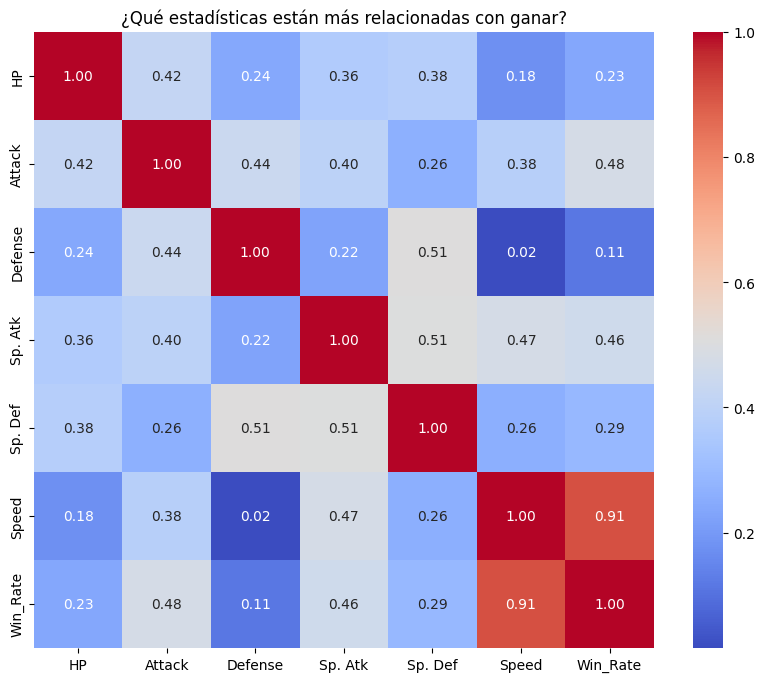

In [ ]:
cols_interes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win_Rate']
correlation = df_final[cols_interes].corr()

# Draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('¿Qué estadísticas están más relacionadas con ganar?')
plt.show()